These functions are designed to be modular and reusable, allowing you to easily create different types of plots with consistent styling and layout.

The plot_scatter function, for instance, takes advantage of these modular utilities to present a scatter plot that adheres to the established style -- with a focus on the central axes and a neatly positioned legend.

When you combine these functions with a DataFrame structured with MultiIndex columns, where one of the levels is a date, you can visualize complex datasets with clear and informative plots. Each function builds upon the principles of modular coding, enabling you to mix and match functionalities as needed for your data visualization tasks.


- create_plot: Initializes a Matplotlib figure and axes with a given size and DPI.

- format_dates: Sets up date formatting for the x-axis based on a given date format (yearly or monthly).

- add_last_value_line: Adds a horizontal line to the plot representing the last value in a given series.

- set_y_axis_formatter: Configures the y-axis formatter, for instance, to display values in thousands.

- adjust_layout: Tweaks the plot layout by setting margins, making certain spines invisible, and positioning the legend below the plot without a box.

- save_or_show_plot: Saves the plot to a file or displays it, depending on whether a save path is provided.

- plot_with_last_value: Plots a time series from a DataFrame, with the ability to format dates, add a line for the last value, set y-axis formatting, adjust the layout, and save or display the plot.

- plot_two_ts: Plots two time series from a DataFrame with similar capabilities as plot_with_last_value, tailored for dual time series.

- plot_scatter: Creates a scatter plot from a transposed DataFrame grouped by the first level of a MultiIndex. This function annotates the scatter points, adjusts the layout, and manages spine visibility to emphasize the central axes.

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mtick

In [14]:
# Creating a fake DataFrame to plot
# Set a seed for reproducibility
np.random.seed(0)

# Generate a datetime index for one year with monthly frequency
dates = pd.date_range(start='2020-01-01', end='2020-12-31', freq='M')

# Generate random data to represent monthly closing prices of two stocks
closing_prices_1 = np.random.rand(len(dates)) * 1000  # Random data to represent stock prices for the first stock
closing_prices_2 = closing_prices_1 * 1.5  # Random data for the second stock, correlated to the first

# Create a DataFrame using the dates as an index and the generated data
df = pd.DataFrame({'Closing Price 1': closing_prices_1, 'Closing Price 2': closing_prices_2}, index=dates)

In [15]:
# Create a mock DataFrame with MultiIndex columns
multi_index = pd.MultiIndex.from_product(
    [['index1', 'index2'], pd.date_range('2024-01-01', periods=5)],
    names=['Index Name', 'Date']
)
data = np.random.rand(5, 10)  # 5 days of data for 2 indices and 5 parameters each
df_scatter = pd.DataFrame(data, columns=multi_index)
df_scatter = (df_scatter - 0.1) *10

# OK

In [43]:
# Define a color palette as a dictionary of color names and RGB tuples
color_palette = {
    'blue': (0/255, 100/255, 0/255),   # Blue color
    'green': (60/255, 180/255, 75/255),   # Green color
    'red': (245/255, 66/255, 66/255)      # Red color
}

In [30]:
def create_plot(figsize=(14, 7), dpi=100):
    """Initializes and returns a Matplotlib figure and axes.
    Parameters:
    - figsize: tuple of (width, height) in inches.
    - dpi: int, dots per inch (resolution of the figure).
    - background_color: str, the background color of the figure.
    
    Returns:
    - fig: Matplotlib Figure object.
    - ax: Matplotlib Axes object.
    """
    fig, ax = plt.subplots(figsize=figsize, dpi=dpi)
    return fig, ax

def format_dates(ax, date_format, custom_format=None):
    """
    Formats the dates on the x-axis of a Matplotlib Axes object according to predefined or custom formats.
    
    Parameters:
    - ax: Matplotlib Axes object, the axes to format.
    - date_format: str, predefined format options ('year', 'month') or 'custom' for using custom_format.
    - custom_format: str, a strftime format string (used if date_format is 'custom').
    
    Raises:
    - ValueError: If an invalid date_format is provided.
    """
    if date_format == 'year':
        ax.xaxis.set_major_locator(mdates.YearLocator())
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    elif date_format == 'month':
        ax.xaxis.set_major_locator(mdates.MonthLocator())
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
    elif date_format == 'custom' and custom_format:
        ax.xaxis.set_major_formatter(mdates.DateFormatter(custom_format))
    else:
        raise ValueError("Invalid date_format. Available options: 'year', 'month', or 'custom' with custom_format specified.")

def add_last_value_line(ax, series, label='', color='blue', linestyle='--', linewidth=2):
    """Adds a horizontal line representing the last value of the series."""
    last_value = series.iloc[-1]
    ax.axhline(y=last_value, color=color, linestyle=linestyle, linewidth=linewidth, label=label)

def set_y_axis_formatter(ax, y_axis_format):
    """Sets the y-axis formatter."""
    if y_axis_format == 'T':
        ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

def adjust_layout(ax, legend='', right_spine_visible=False):
    """Adjusts the plot layout and adds a legend if provided."""
    ax.margins(x=0)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(right_spine_visible)  # Keep this line to respect your preference
    if legend:
        ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=False, shadow=False, ncol=5, frameon=False)
    plt.tight_layout()

def save_or_show_plot(fig, save_path=None):
    """Saves the plot to a file or shows it."""
    if save_path:
        fig.savefig(save_path, format='png', dpi=300, bbox_inches='tight')
        print(f"Plot saved to: {save_path}")
    else:
        plt.show()

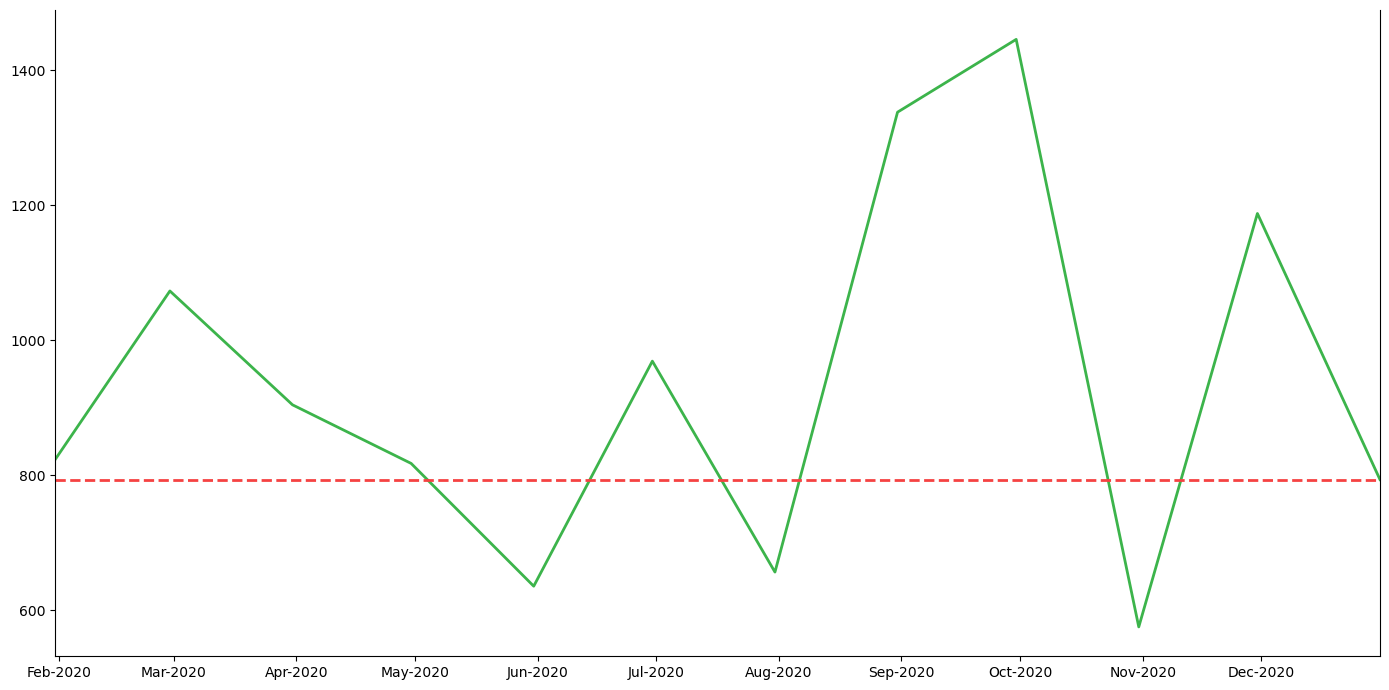

In [41]:
def plot_with_last_value(df, column, date_format='month', legend='', y_axis_format=None, ts_color='blue', last_value_color='red', save_path=None):
    fig, ax = create_plot()  # Initialize the plot with default size and DPI
    format_dates(ax, date_format)  # Format the dates on the x-axis
    
    # Choose colors from the palette for the time series and last value lines
    ts_line_color = color_palette.get(ts_color, (0, 0, 0))  # Default to black if color not found
    last_value_line_color = color_palette.get(last_value_color, (0, 0, 0))  # Default to black if color not found
    
    # Plot the specified time series column
    ax.plot(df.index, df.iloc[:, column], label=legend, color=ts_line_color, linewidth=2)
    
    # Add a horizontal line for the last value of the specified series
    add_last_value_line(ax, df.iloc[:, column], label=f'Last {legend}' if legend else 'Last Value', color=last_value_line_color)
    
    set_y_axis_formatter(ax, y_axis_format)  # Set the y-axis formatter if needed
    adjust_layout(ax, legend)  # Adjust the layout and add the legend
    
    save_or_show_plot(fig, save_path)  # Save the plot or show it

# Assuming df is a pandas DataFrame with datetime index and at least one column of time series data
plot_with_last_value(df, 1, date_format='month', legend='SX5E', y_axis_format=None, ts_color='green', last_value_color='red', save_path=None)

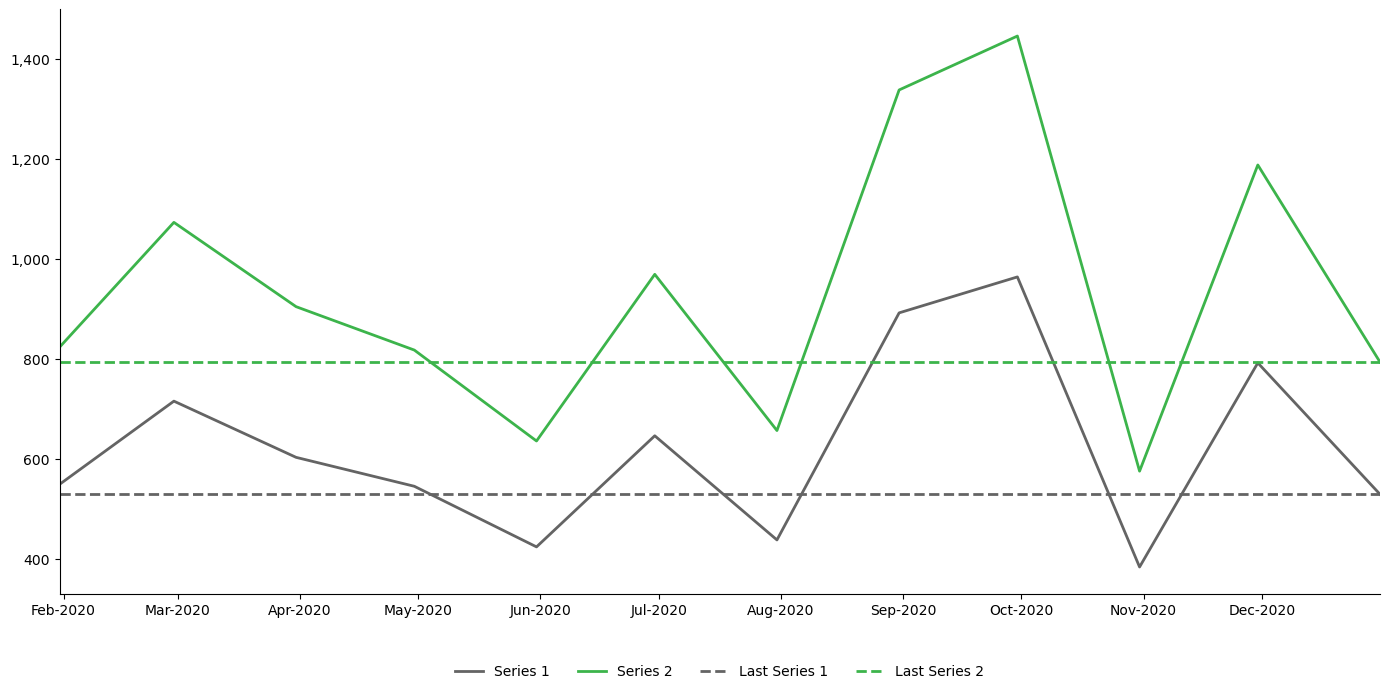

In [19]:
def plot_two_ts(df, col1, col2, datefmt='month', legend_col1='TS1', legend_col2='TS2', y_axis_format=None, color1='blue', color2='green', save_path=None):
    fig, ax = create_plot()  # Use the common function to initialize the plot
    
    # Choose colors from the palette based on color names
    line_color1 = color_palette.get(color1, (0, 0, 0))  # Default to black if color not found
    line_color2 = color_palette.get(color2, (0, 0, 0))  # Default to black if color not found
    
    # Plot the two time series using the column index
    ax.plot(df.index, df.iloc[:, col1], label=legend_col1, color=line_color1, linewidth=2)
    ax.plot(df.index, df.iloc[:, col2], label=legend_col2, color=line_color2, linewidth=2)
    
    # Add horizontal lines for the last value of each time series
    add_last_value_line(ax, df.iloc[:, col1], label=f'Last {legend_col1}', color=line_color1)
    add_last_value_line(ax, df.iloc[:, col2], label=f'Last {legend_col2}', color=line_color2)
    
    # Use the common function to format dates on the x-axis
    format_dates(ax, datefmt)
    
    # Use the common function to set the y-axis formatter if specified
    set_y_axis_formatter(ax, y_axis_format)
    
    # Use the common function to adjust the layout and add the legend
    adjust_layout(ax, legend=(legend_col1 if legend_col1 else '') + (' & ' + legend_col2 if legend_col2 else ''))
    
    # Use the common function to save the plot or show it
    save_or_show_plot(fig, save_path)
plot_two_ts(df, col1=0, col2=1, datefmt='month', legend_col1='Series 1', legend_col2='Series 2', y_axis_format='T', color1='blue', color2='green', save_path=None)

In [20]:
df_scatter= df_scatter *10
df_scatter

Index Name     index1                                                 index2  \
Date       2024-01-01 2024-01-02 2024-01-03 2024-01-04 2024-01-05 2024-01-01   
0           46.804456  82.559664  -2.896394  -1.287070  -7.978160  73.261985   
1           36.147936  68.052918   1.827443  53.992102   4.335329  84.466892   
2           35.615033  46.843395  -8.121020  51.763550  51.209572  51.693400   
3           59.763120  -3.977453  56.676672  57.063787  11.038256   2.892630   
4           88.837384   0.204481  10.887676   6.130952  55.310833  15.329160   

Index Name                                              
Date       2024-01-02 2024-01-03 2024-01-04 2024-01-05  
0           67.815675  77.001215  87.861834  69.915856  
1           42.184832  31.466194  16.455561  67.423369  
2           84.374808  58.182030  25.950790  33.703195  
3           21.542835  26.371077  47.019677  33.860151  
4           36.631077  14.442559   5.896958   1.037514

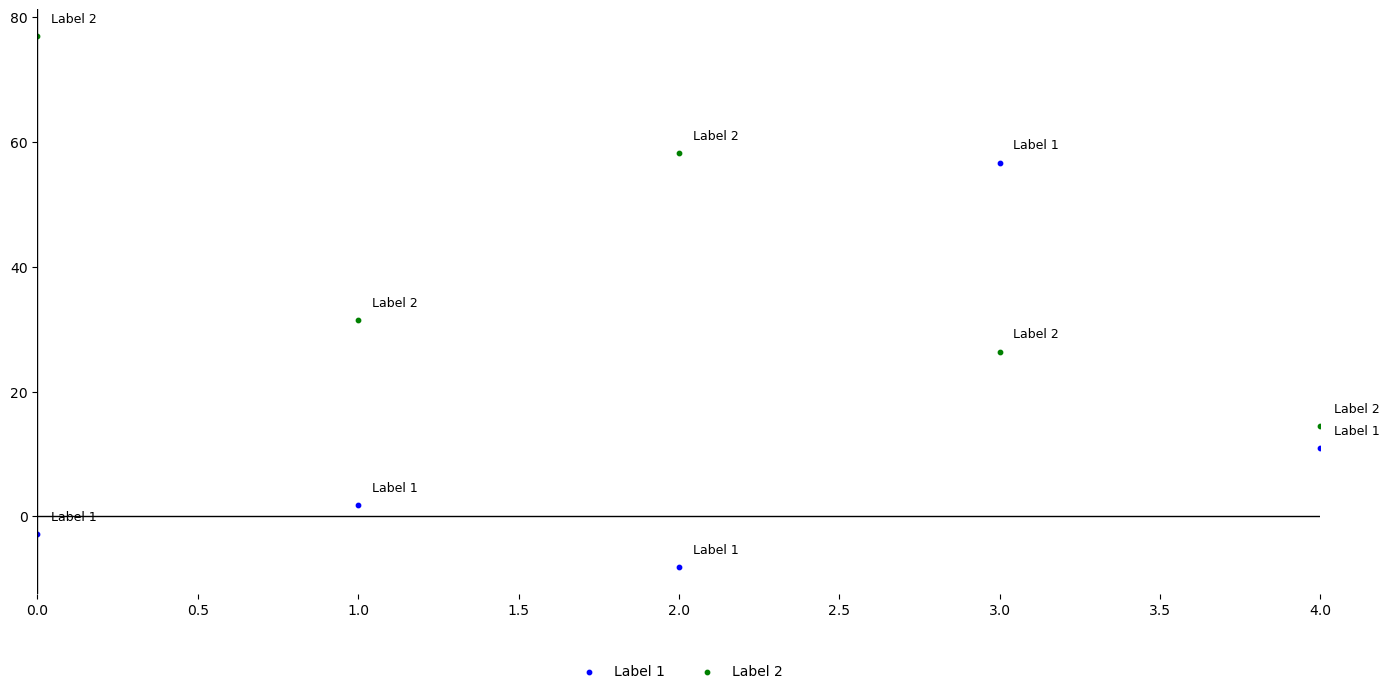

In [21]:
def plot_scatter(df, date, color_dict, source, labels, labels_none):
    fig, ax = plt.subplots(figsize=(14, 7))
    for name, group in df.T.groupby(level=0):
        if name in labels_none:
            continue
        data = group.xs(date, level=1, axis=0).squeeze()
        x_values = range(len(data))
        y_values = data.values
        label = labels.get(name, name)
        ax.scatter(x_values, y_values, label=label, color=color_dict.get(name, 'black'), s=10)
        for x, y in zip(x_values, y_values):
            ax.annotate(label, (x, y), textcoords="offset points", xytext=(10, 10), fontsize=9)
    
    adjust_layout(ax, 'Scatter Plot Legend')

    # Hide all spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

    # Draw lines at x=0 and y=0
    ax.axhline(y=0, color='black', linestyle='-', linewidth=1)
    ax.axvline(x=0, color='black', linestyle='-', linewidth=1)

    plt.show()
    
# Define the necessary variables
date = pd.Timestamp('2024-01-03')
color_dict = {'index1': 'blue', 'index2': 'green'}
source = 'DataSource'
labels = {'index1': 'Label 1', 'index2': 'Label 2'}
labels_none = []

# Assuming df_scatter and other variables are defined as before
plot_scatter(df_scatter, date, color_dict, source, labels, labels_none)

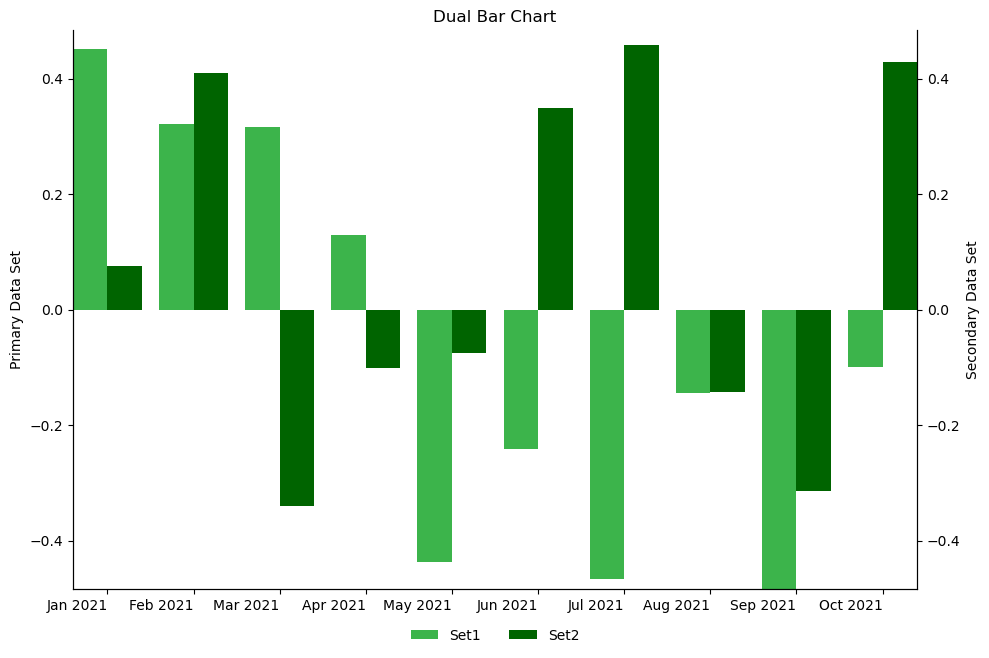

In [50]:
def adjust_layout(ax, right_spine_visible=False):
    """Adjusts the plot layout with an option to keep the right spine visible."""
    ax.margins(x=0)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(right_spine_visible)
    plt.tight_layout()

def plot_dual_bar(data, bar_width=0.4, label1='Set1', label2='Set2', color1='green', color2='blue',
              ylabel_primary='Primary Data Set', ylabel_secondary='Secondary Data Set',
              title='Dual Bar Chart', invert_right_y=False, figsize=(10, 6)):

    # Initialize the plot
    fig, ax1 = plt.subplots(figsize=figsize)
    ax2 = ax1.twinx()

    # Ensure the data.index is of datetime type for better x-axis formatting and set limits
    data.index = pd.to_datetime(data.index)
    all_values = pd.concat([data.iloc[:, 0], data.iloc[:, 1]])
    limit = max(abs(all_values.min()), abs(all_values.max()))
    ax1.set_ylim(-limit, limit)
    ax2.set_ylim(-limit, limit)

    # Plot bars using the color palette                    
    indices = np.arange(len(data))
    ax1.bar(indices - bar_width / 2, data.iloc[:, 0], width=bar_width, color=color_palette.get(color1, (0, 0, 0)), label=label1)
    ax2.bar(indices + bar_width / 2, data.iloc[:, 1], width=bar_width, color=color_palette.get(color2, (0, 0, 0)), label=label2)

    # Optionally invert the right y-axis
    if invert_right_y:
        ax2.set_ylim(ax2.get_ylim()[::-1])

    # Set labels and title
    ax1.set_ylabel(ylabel_primary)
    ax2.set_ylabel(ylabel_secondary)
    ax1.set_title(title)
    ax1.set_xticks(indices)
    ax1.set_xticklabels(data.index.strftime('%b %Y'), rotation=0, ha="right")

    # Adjust layout for both axes
    adjust_layout(ax1, right_spine_visible=True)
    adjust_layout(ax2, right_spine_visible=True)

    # Manually creating and adjusting the legends
    handles, labels = ax1.get_legend_handles_labels()
    handles2, labels2 = ax2.get_legend_handles_labels()
    fig.legend(handles + handles2, labels + labels2, loc='lower center', bbox_to_anchor=(0.5, -0.1), ncol=2, fancybox=False, shadow=False, frameon=False)

    plt.subplots_adjust(bottom=0.01)  # Adjust to make space for the external legend

    plt.show()

# Test the function with example data
array_data = np.random.rand(10, 2) - 0.5  # Generate random data
dates = pd.date_range(start='2021-01-01', periods=array_data.shape[0], freq='M')
data = pd.DataFrame(array_data, index=dates, columns=['Set1', 'Set2'])

plot_dual_bar(data, bar_width=0.4, label1='Set1', label2='Set2', color1='green', color2='blue',
              ylabel_primary='Primary Data Set', ylabel_secondary='Secondary Data Set',
              title='Dual Bar Chart', invert_right_y=False, figsize=(10, 6))

# DEV